### Step 2: Feature Trends 
**Objective**: Analyze the relationship between smartphone features and pricing, as well as identify trends in feature adoption across segments.  

---

#### **Key Tasks**  
1. **Feature Impact on Pricing**:  
   - Analyze the correlation between features (e.g., RAM, battery capacity, 5G, fast charging) and smartphone prices.  
   - Evaluate premium features like IR blasters or NFC to determine their influence on premium pricing.  
 
---

#### **Deliverables for Step 2**  

1. **Feature-Price Analysis**:  .  
   - Specific insights on which features significantly drive higher pricing, especially in premium devices.  

3. **Insights Summary**:  
   - Key observations about feature impact on pricing.  
  

# Import Libraries

In [1]:
import os

import numpy as np

import pandas as pd

import seaborn as sns

import matplotlib.pyplot as plt

from pathlib import Path

from sklearn.preprocessing import PowerTransformer

from src.utils.utils import (
    get_data,
    outlier_overview, 
    export_data, 
    prepare_segment_trends_data, 
    numerical_categorical_analysis,
    anova_test,
    test_for_normality,
    mann_whitney_test,
    numerical_analysis,
    two_sample_independent_ttest,
    levene_test,
    categorical_analysis
    
)

from scipy.stats import probplot, pearsonr

from src.constants.constants import FIG_SIZE

In [2]:
# Set the maximum number of columns to display
pd.set_option('display.max_columns', None) 

# Read the Data

In [3]:
df = get_data("smartphone_cleaned_v5", "raw")
analysis_df = prepare_segment_trends_data(df)
analysis_df.head()

,brand_name,model,price,rating,has_5g,has_nfc,has_ir_blaster,processor_brand,num_cores,processor_speed,battery_capacity,fast_charging_available,fast_charging,ram_capacity,internal_memory,screen_size,refresh_rate,resolution,num_rear_cameras,num_front_cameras,os,primary_camera_rear,primary_camera_front,extended_memory_available,extended_upto
0,oneplus,OnePlus 11 5G,54999,89.0,True,True,False,snapdragon,8.0,3.2,5000.0,1,100.0,12.0,256.0,6.70,120,1440 x 3216,3,1.0,android,50.0,16.0,0,0.0
1,oneplus,OnePlus Nord CE 2 Lite 5G,19989,81.0,True,False,False,snapdragon,8.0,2.2,5000.0,1,33.0,6.0,128.0,6.59,120,1080 x 2412,3,1.0,android,64.0,16.0,1,1024.0
2,samsung,Samsung Galaxy A14 5G,16499,75.0,True,False,False,exynos,8.0,2.4,5000.0,1,15.0,4.0,64.0,6.60,90,1080 x 2408,3,1.0,android,50.0,13.0,1,1024.0
3,motorola,Motorola Moto G62 5G,14999,81.0,True,False,False,snapdragon,8.0,2.2,5000.0,1,NaN,6.0,128.0,6.55,120,1080 x 2400,3,1.0,android,50.0,16.0,1,1024.0
4,realme,Realme 10 Pro Plus,24999,82.0,True,False,False,dimensity,8.0,2.6,5000.0,1,67.0,6.0,128.0,6.70,120,1080 x 2412,3,1.0,android,108.0,16.0,0,0.0


In [4]:
budget = (
    analysis_df
    .loc[lambda x: x['price'] <= 23000]
)

In [5]:
mid = (
    analysis_df
    .loc[lambda x: (x['price'] > 23000) & (x['price'] <= 50000)]
)

In [6]:
premium = (
    analysis_df
    .loc[lambda x: x['price'] > 50000]
)

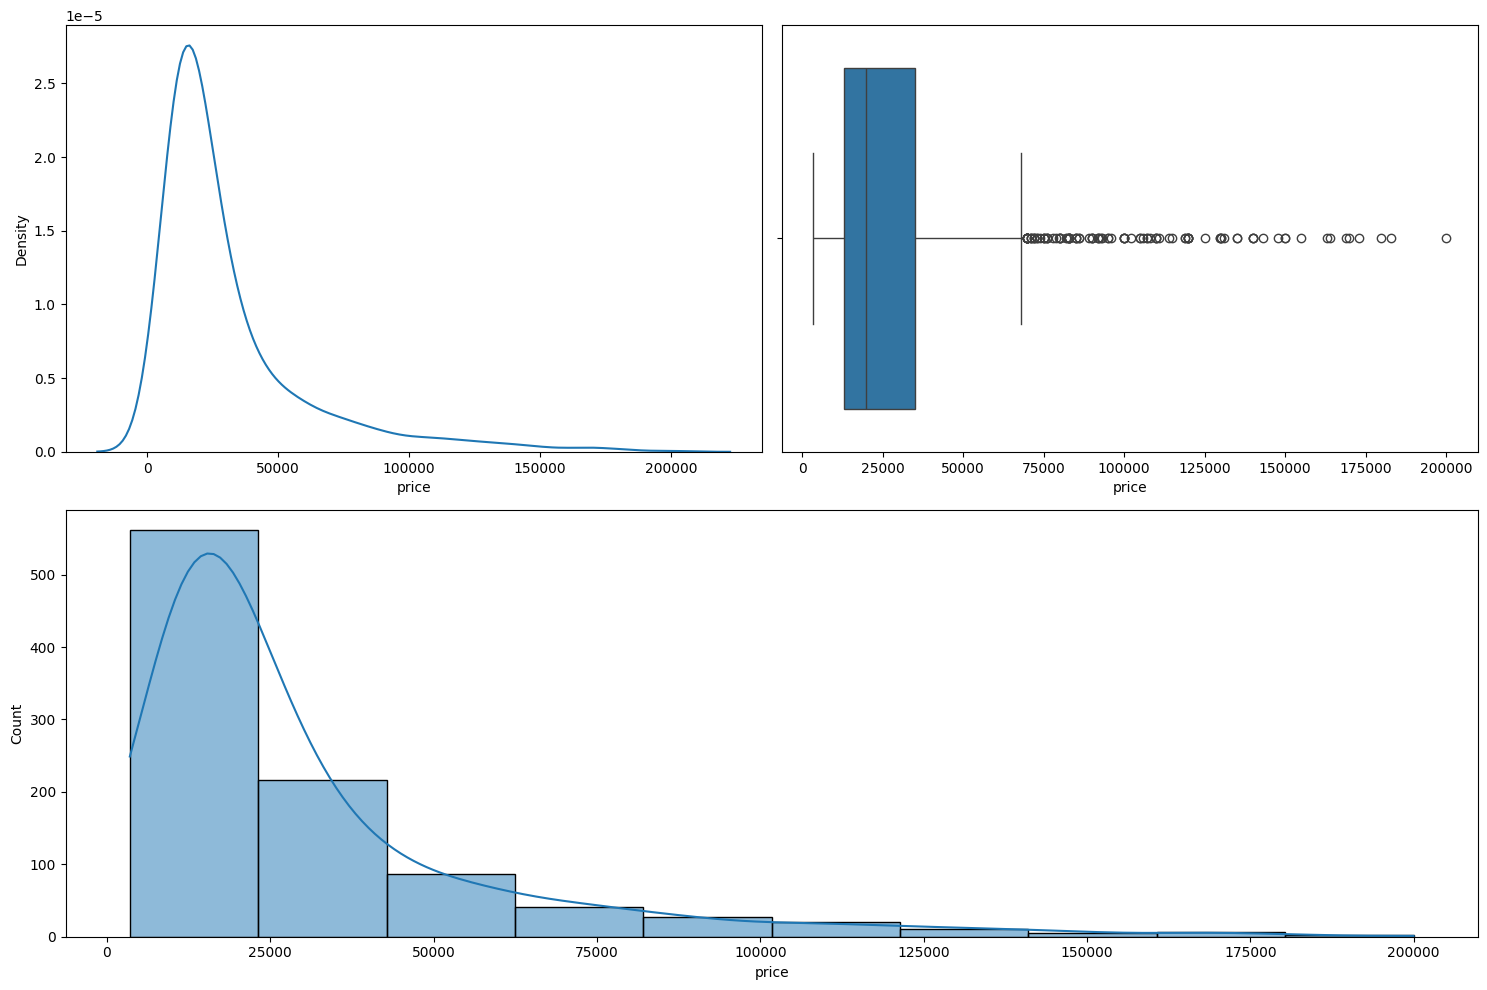

In [7]:
numerical_analysis(analysis_df, "price", bins = 10)

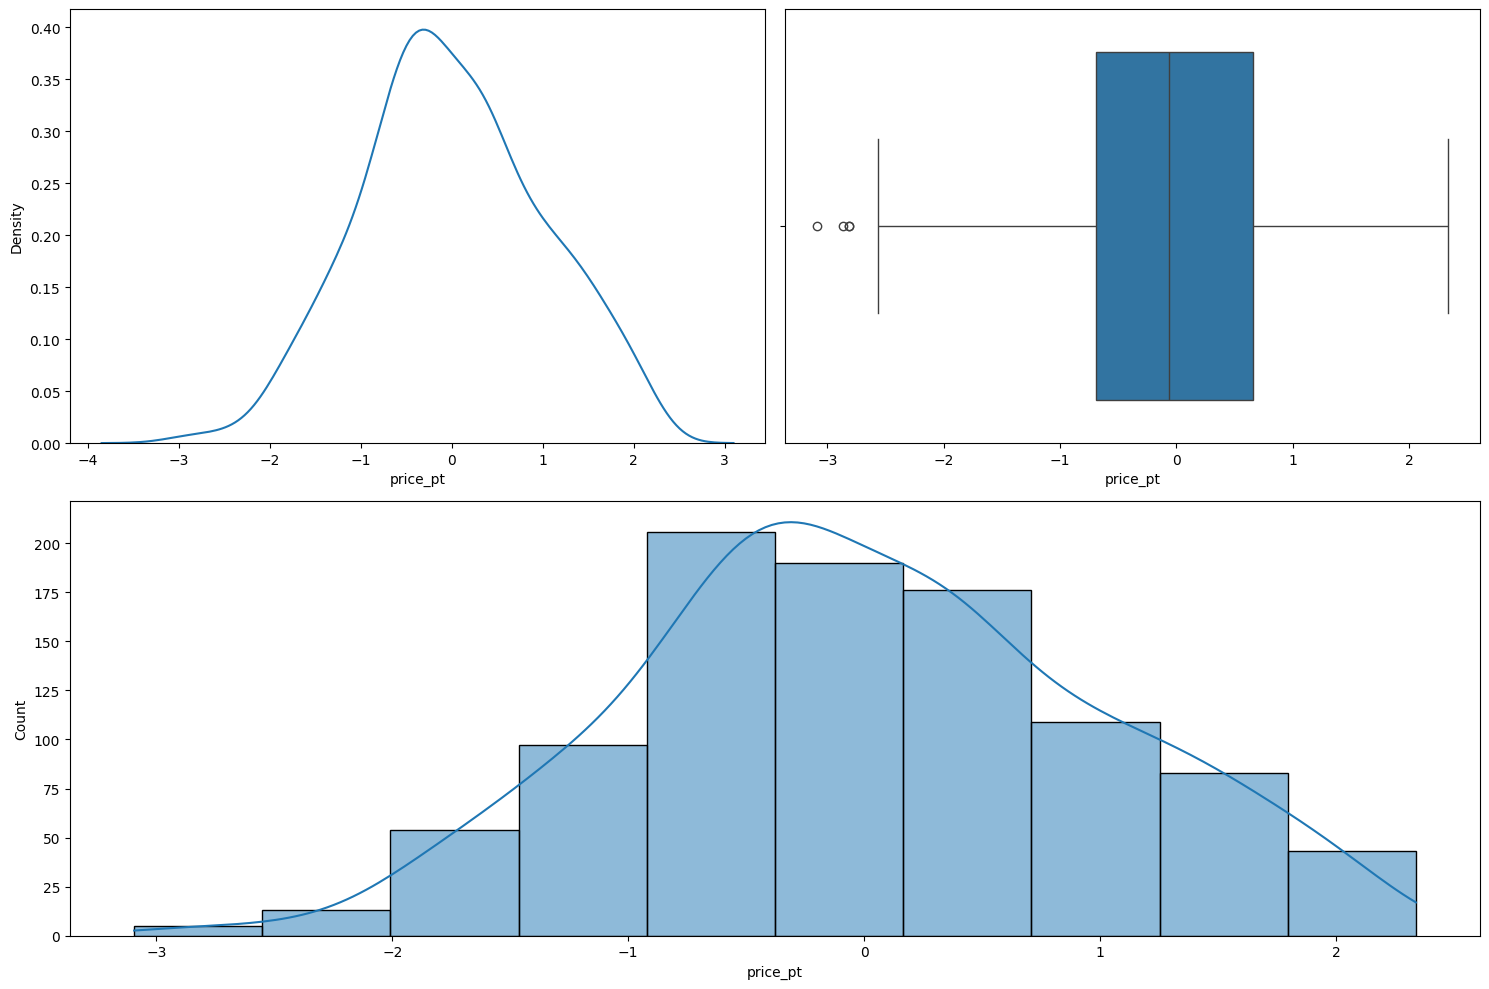

In [8]:
pt = PowerTransformer(method = "yeo-johnson")

analysis_df = analysis_df.assign(price_pt = lambda df: pt.fit_transform(analysis_df[["price"]]))

numerical_analysis(analysis_df, "price_pt", bins=10)

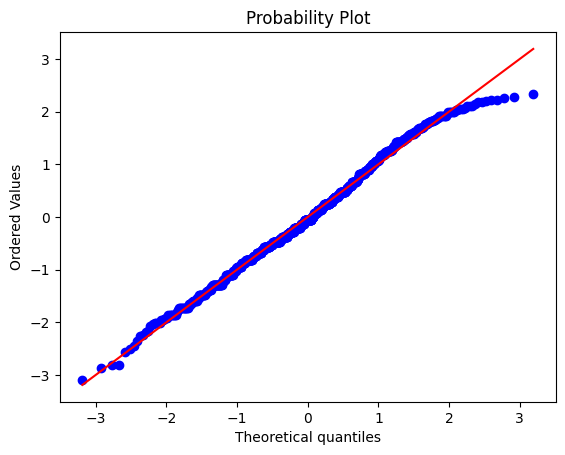

In [9]:
# plot QQ plot for the price

probplot(analysis_df["price_pt"], plot = plt)
plt.show()

In [10]:
test_for_normality(dataframe = analysis_df, column_name = "price_pt")

Jarque Bera Test for Normality
0.07228337941564213
Fail to reject the null hypothesis. The data is normally distributed.


## Observations

- Price column is positively skewed.
- Price column is normally distributed after applying yeo-johnson power transformer.

# Feature Impact on Pricing

## 5g vs price

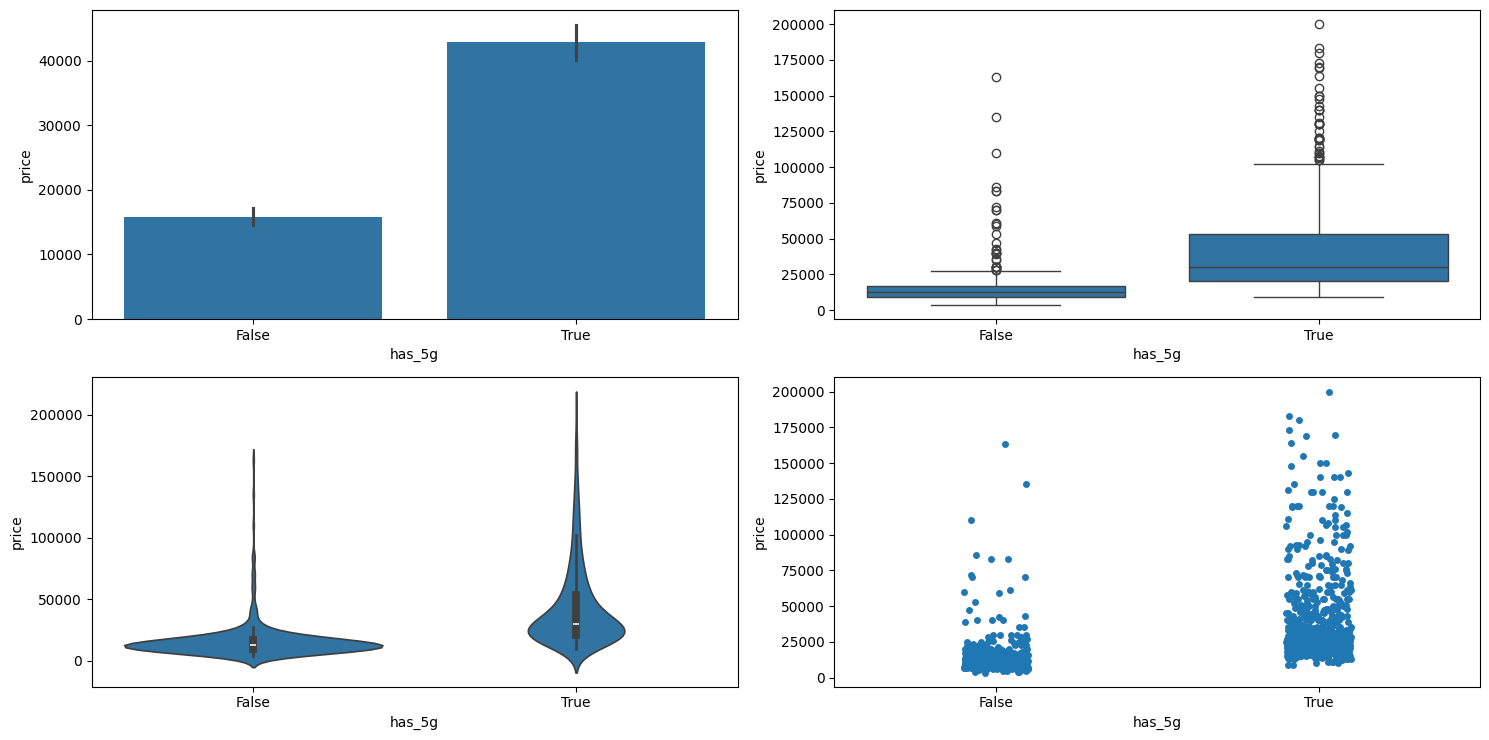

In [11]:
numerical_categorical_analysis(dataframe = analysis_df, cat_column_1= "has_5g", num_column = "price")

In [12]:
levene_test(dataframe = analysis_df, num_col= "price" , cat_col = "has_5g")

Levene's Test p-value: 1.0927032183216708e-23
Reject the null hypothesis. The variances across the groups are significantly different.


In [13]:
two_sample_independent_ttest(dataframe = analysis_df, num_col = "price_pt", cat_col = "has_5g")

T-statistic: 26.1754, p-value: 0.0000
Reject the null hypothesis. The means of price_pt differ between the two categories of has_5g.


In [14]:
mann_whitney_test(dataframe = analysis_df, num_col = "price", cat_col = "has_5g", group_1 = True, group_2 = False)

Mann-Whitney U Test Results for price by has_5g:
Test Statistic: 209328.0
P-Value: 1.6046667093857926e-98
Reject the null hypothesis: There is a significant difference in price between True and False.


## fast_charging vs price

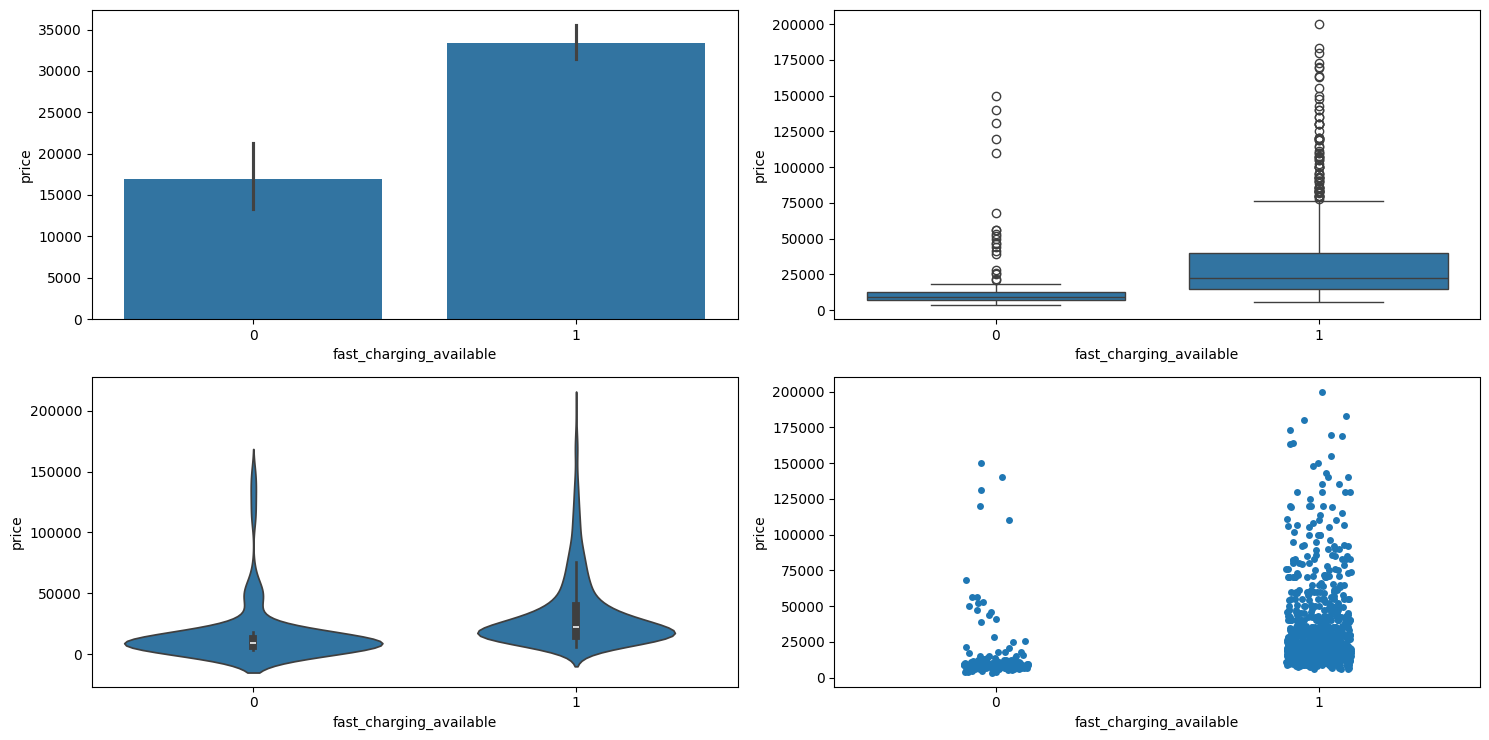

In [15]:
numerical_categorical_analysis(dataframe = analysis_df, cat_column_1= "fast_charging_available", num_column = "price")

In [16]:
levene_test(dataframe = analysis_df, num_col= "price" , cat_col = "fast_charging_available")

Levene's Test p-value: 0.00036023119295646274
Reject the null hypothesis. The variances across the groups are significantly different.


In [17]:
two_sample_independent_ttest(dataframe = analysis_df, num_col = "price_pt", cat_col = "fast_charging_available")

T-statistic: 14.9460, p-value: 0.0000
Reject the null hypothesis. The means of price_pt differ between the two categories of fast_charging_available.


In [18]:
mann_whitney_test(dataframe = analysis_df, num_col = "price", cat_col = "fast_charging_available", group_1 = 1, group_2 = 0)

Mann-Whitney U Test Results for price by fast_charging_available:
Test Statistic: 99090.5
P-Value: 9.492785162473348e-38
Reject the null hypothesis: There is a significant difference in price between 1 and 0.


## ram_capacity vs price

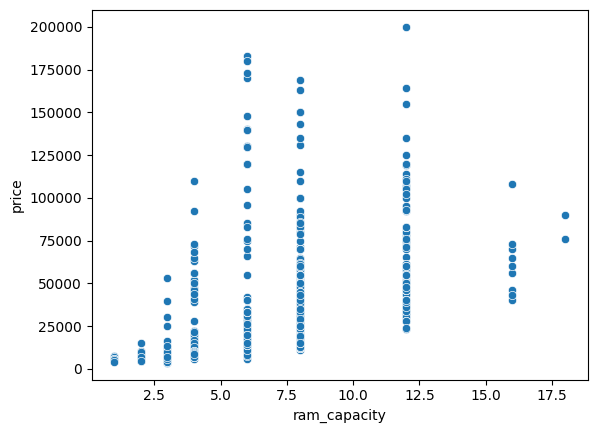

In [19]:
sns.scatterplot(data = analysis_df, x = "ram_capacity",y = "price")
plt.show()

In [27]:
# Calculate Pearson correlation

corr, _ = pearsonr(analysis_df["ram_capacity"], analysis_df["price"])
print(f"Pearson Correlation Coefficient: {corr}")

Pearson Correlation Coefficient: 0.5152649960013111


,Count,Percentage
ram_capacity,,
8.0,338,34.63%
6.0,234,23.98%
4.0,217,22.23%
12.0,84,8.61%
3.0,54,5.53%
2.0,31,3.18%
16.0,9,0.92%
1.0,7,0.72%
18.0,2,0.2%


**************************************************
The unique categories in ram_capacity column are [12.0, 6.0, 4.0, 8.0, 3.0, 16.0, 2.0, 18.0, 1.0]
**************************************************
The number of categories in ram_capacity column are 9


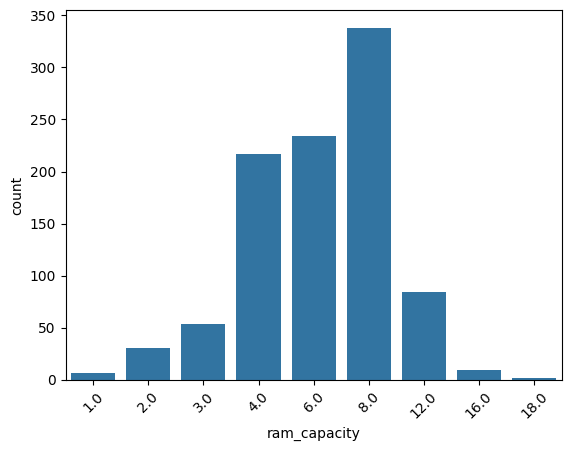

In [21]:
categorical_analysis(analysis_df, "ram_capacity")

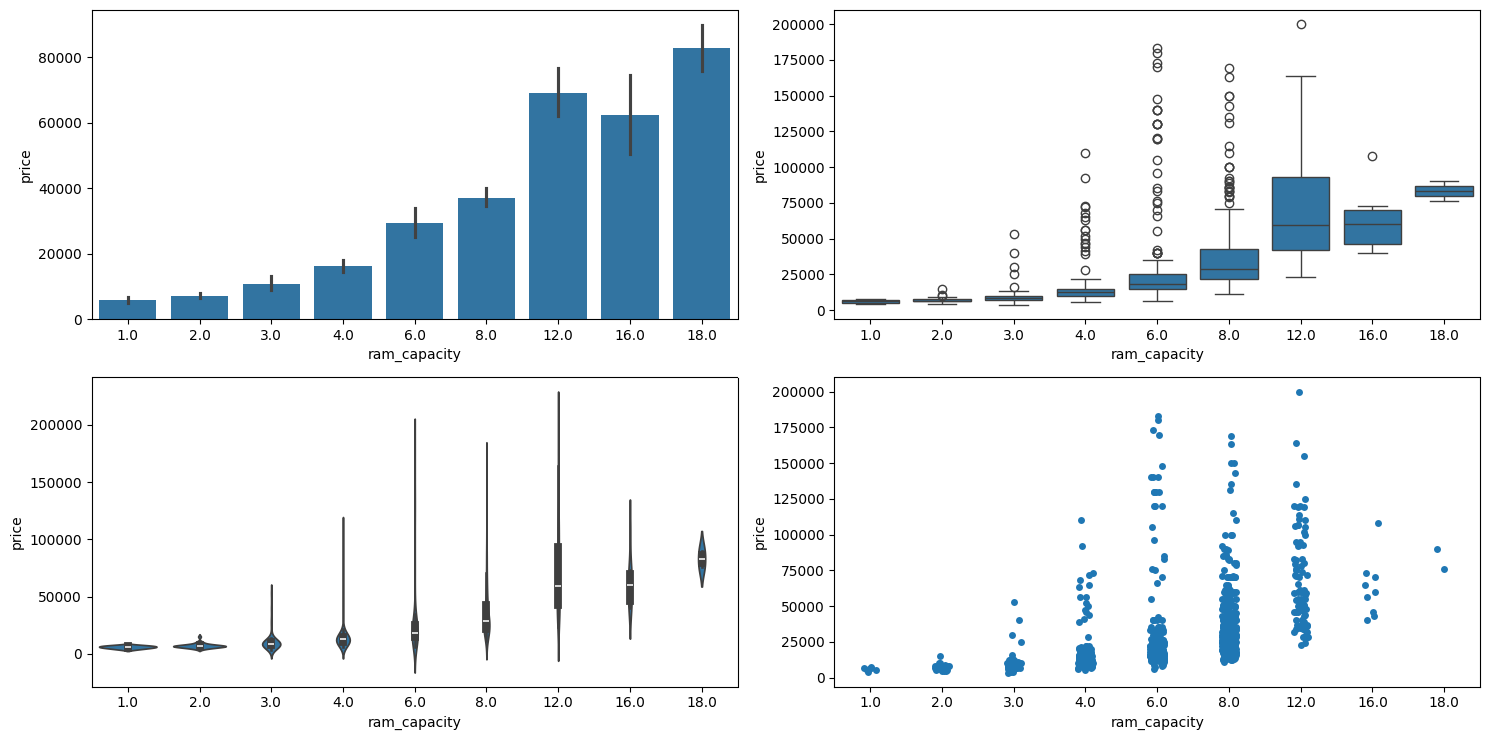

In [22]:
numerical_categorical_analysis(analysis_df, cat_column_1 = "ram_capacity", num_column = "price")

## Observations

-  There is a significant association between Price and 5g.
-  There is a significant association between Price and fast charging.
-  Higher RAM is generally indicative of higher price except for phones with ram = 16 

# Impact of Premium Features on Pricing

In [25]:
premium.head()

,brand_name,model,price,rating,has_5g,has_nfc,has_ir_blaster,processor_brand,num_cores,processor_speed,battery_capacity,fast_charging_available,fast_charging,ram_capacity,internal_memory,screen_size,refresh_rate,resolution,num_rear_cameras,num_front_cameras,os,primary_camera_rear,primary_camera_front,extended_memory_available,extended_upto
0,oneplus,OnePlus 11 5G,54999,89.0,True,True,False,snapdragon,8.0,3.20,5000.0,1,100.0,12.0,256.0,6.7,120,1440 x 3216,3,1.0,android,50.0,16.0,0,0.0
6,apple,Apple iPhone 14,65999,81.0,True,True,False,bionic,6.0,3.22,3279.0,1,NaN,6.0,128.0,6.1,60,1170 x 2532,2,1.0,ios,12.0,12.0,0,0.0
14,samsung,Samsung Galaxy S23 Ultra 5G,114990,NaN,True,True,False,snapdragon,8.0,3.20,5000.0,1,45.0,8.0,256.0,6.8,120,1440 x 3088,4,1.0,android,200.0,12.0,0,0.0
15,apple,Apple iPhone 13,62999,79.0,True,True,False,bionic,6.0,3.22,3240.0,1,NaN,4.0,128.0,6.1,60,1170 x 2532,2,1.0,ios,12.0,12.0,0,0.0
27,apple,Apple iPhone 14 Pro Max,129990,76.0,True,True,False,bionic,6.0,NaN,4323.0,1,NaN,6.0,128.0,6.7,120,1290 x 2796,3,1.0,ios,48.0,12.0,0,0.0


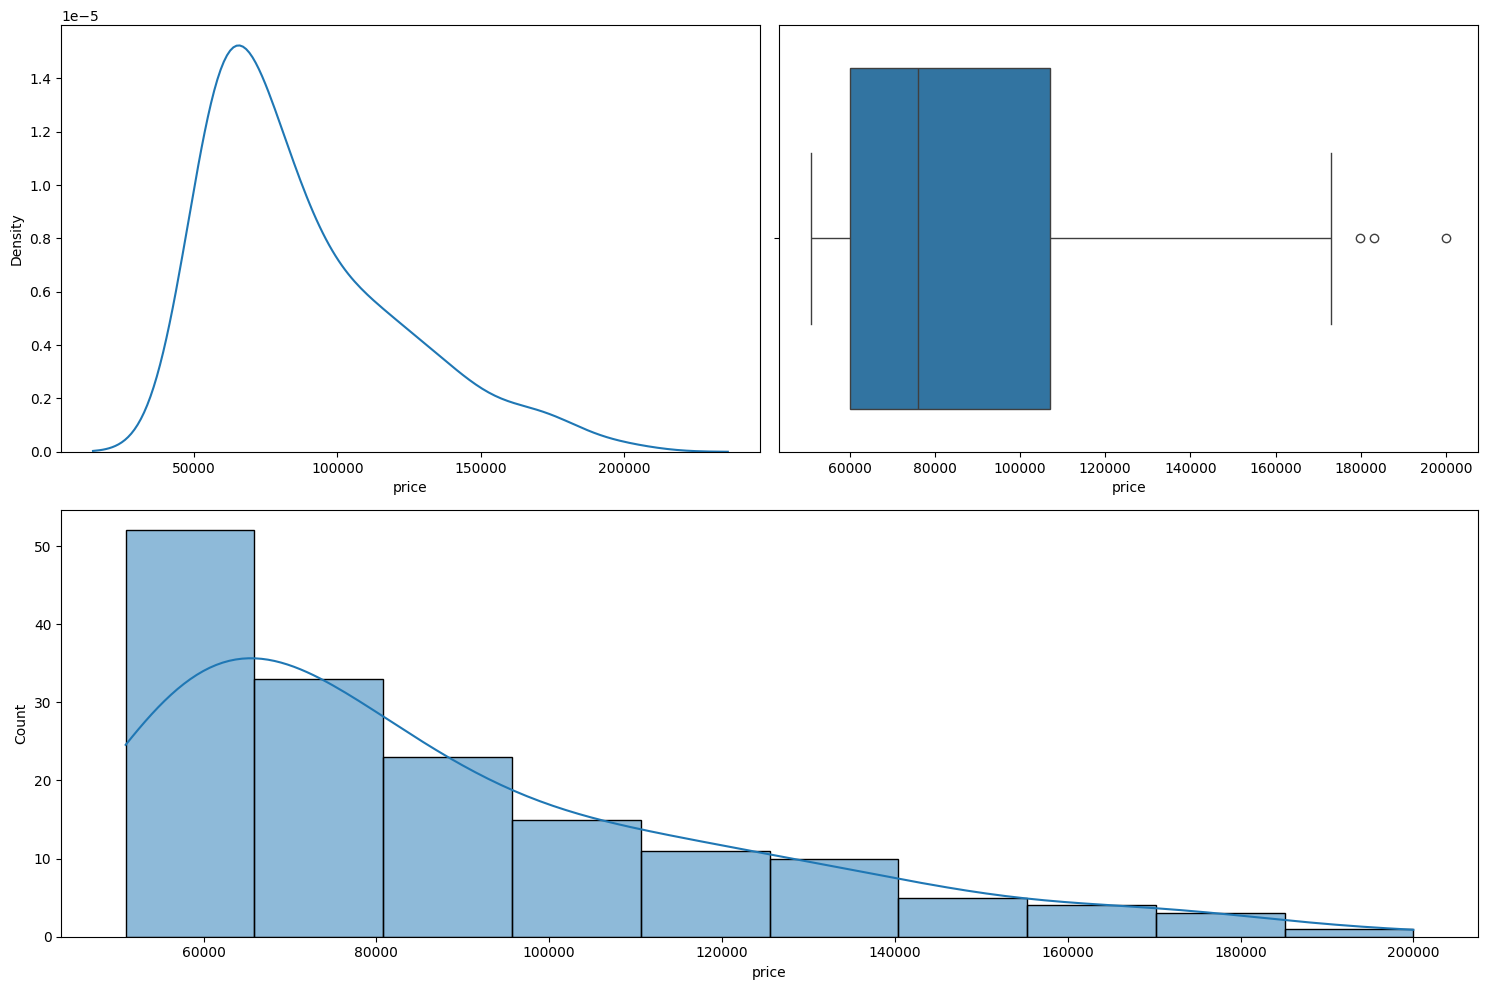

In [30]:
numerical_analysis(premium, "price", bins = 10)

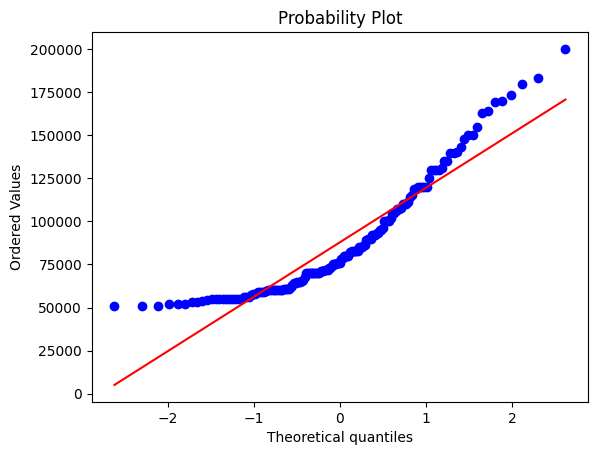

In [32]:
# plot QQ plot for the price

probplot(premium["price"], plot = plt)
plt.show()

In [33]:
premium["price"].skew()

np.float64(1.1588469212639005)

In [35]:
test_for_normality(dataframe = premium, column_name = "price")

Jarque Bera Test for Normality
7.687408101632556e-09
Reject the null hypothesis. The data is not normally distributed.


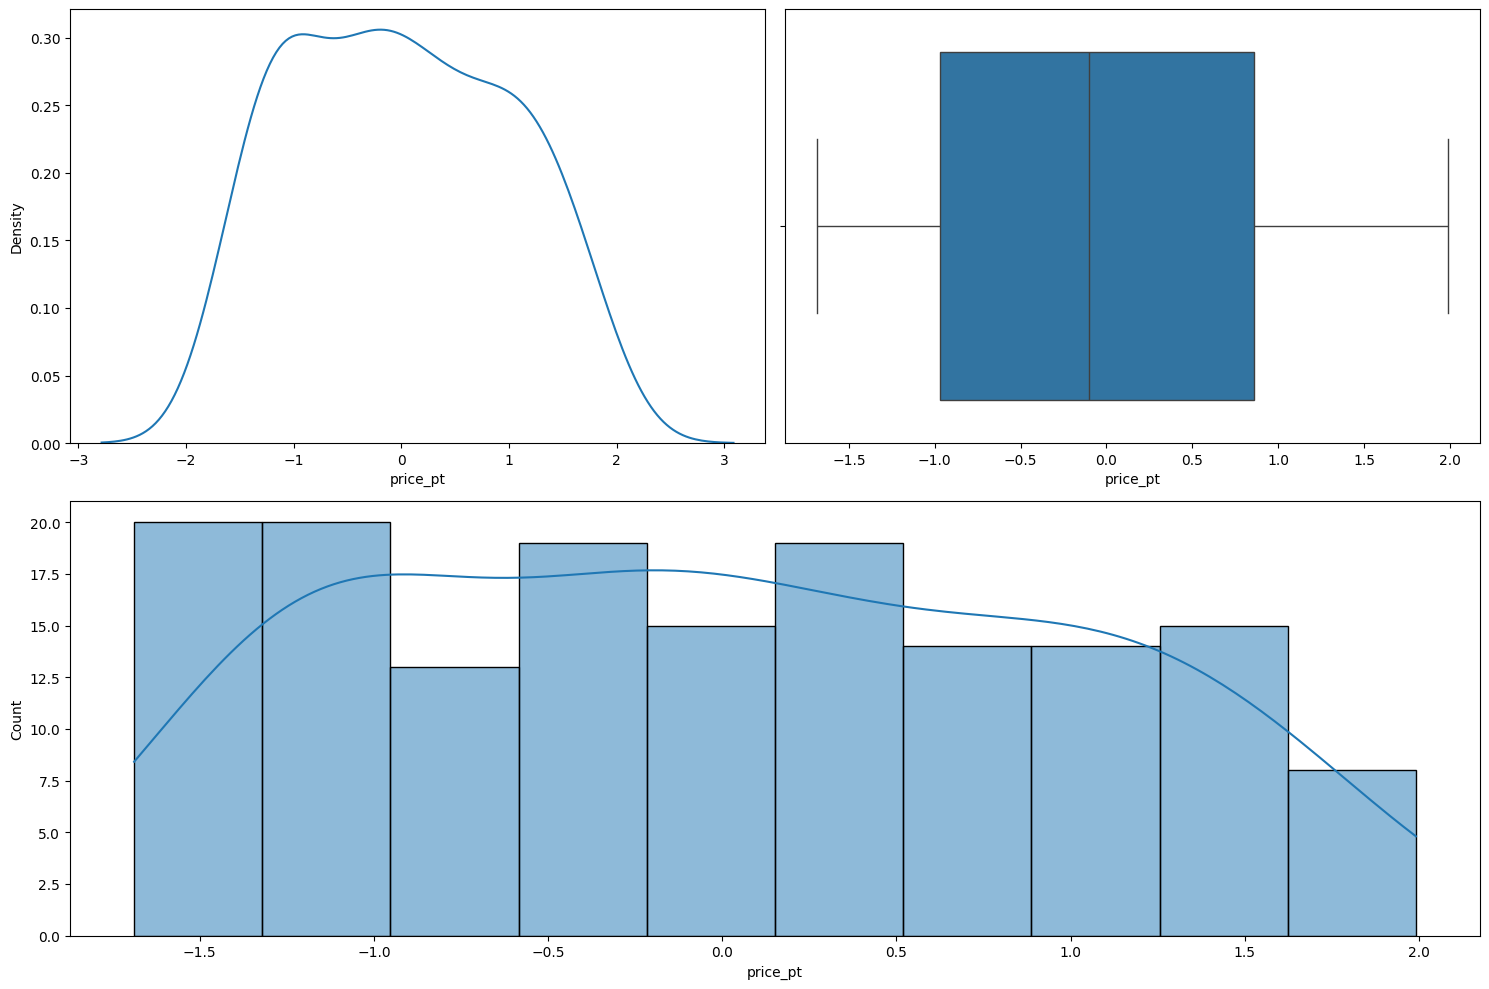

In [36]:
pt = PowerTransformer(method = "yeo-johnson")

premium = premium.assign(price_pt = lambda df: pt.fit_transform(premium[["price"]]))

numerical_analysis(premium, "price_pt", bins=10)

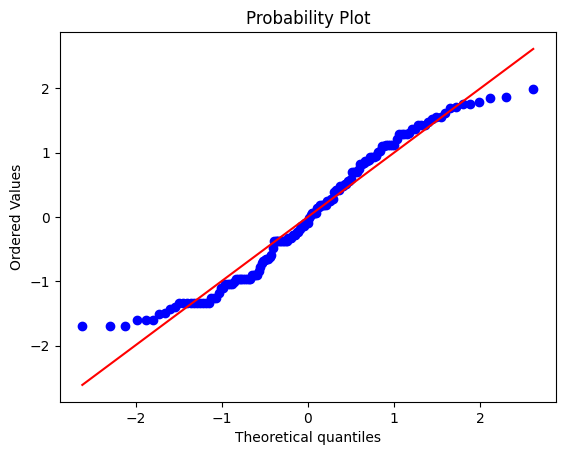

In [38]:
# plot QQ plot for the price

probplot(premium["price_pt"], plot = plt)
plt.show()

In [39]:
test_for_normality(dataframe = premium, column_name = "price")

Jarque Bera Test for Normality
7.687408101632556e-09
Reject the null hypothesis. The data is not normally distributed.


## NFC vs price

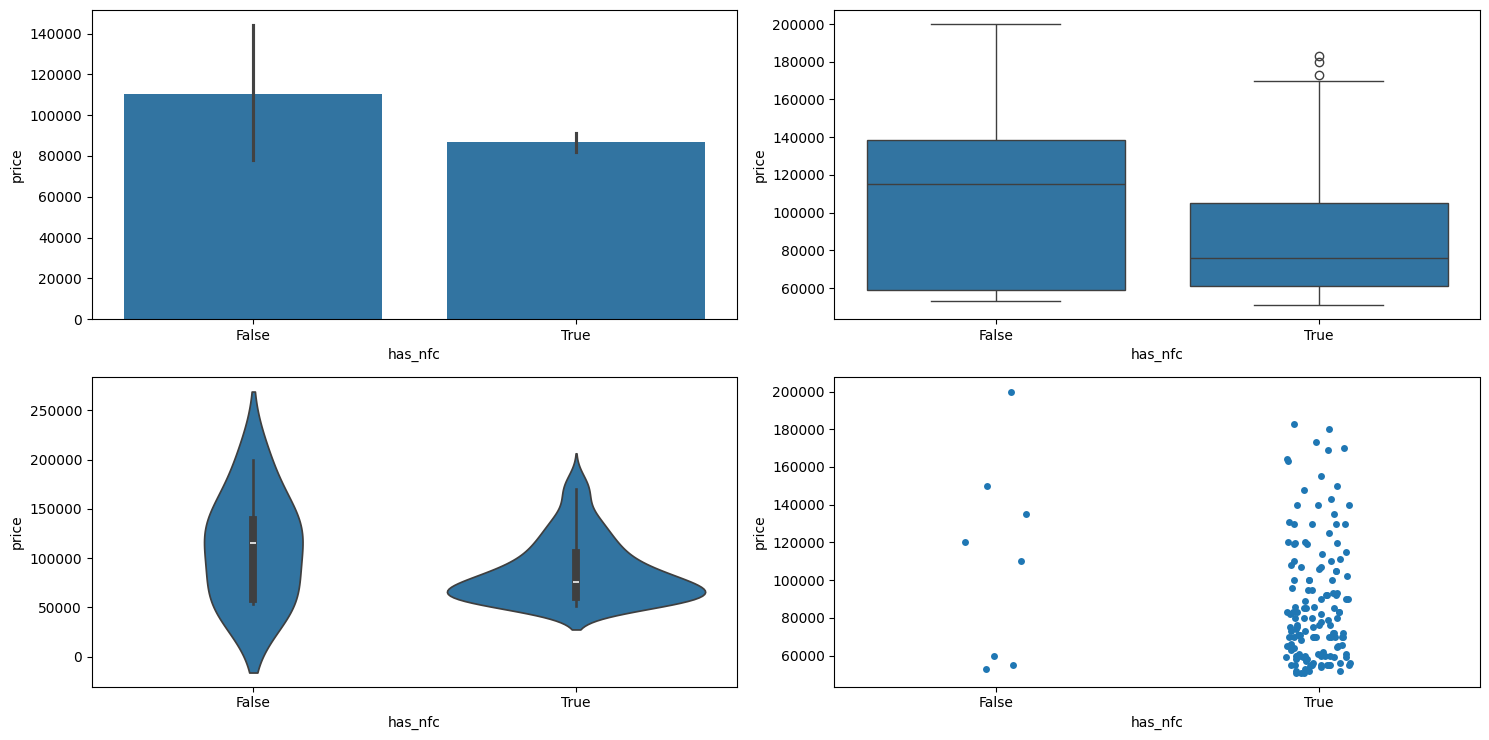

In [26]:
numerical_categorical_analysis(dataframe = premium, cat_column_1= "has_nfc", num_column = "price")

In [40]:
mann_whitney_test(dataframe = premium, num_col = "price", cat_col = "has_nfc", group_1 = 1, group_2 = 0)

Mann-Whitney U Test Results for price by has_nfc:
Test Statistic: 465.5
P-Value: 0.29933457890154413
Fail to reject the null hypothesis: No significant difference in price between 1 and 0.


## IR Blaster vs price

In [43]:
premium.has_ir_blaster.value_counts()

has_ir_blaster
False    136
True      21
Name: count, dtype: int64

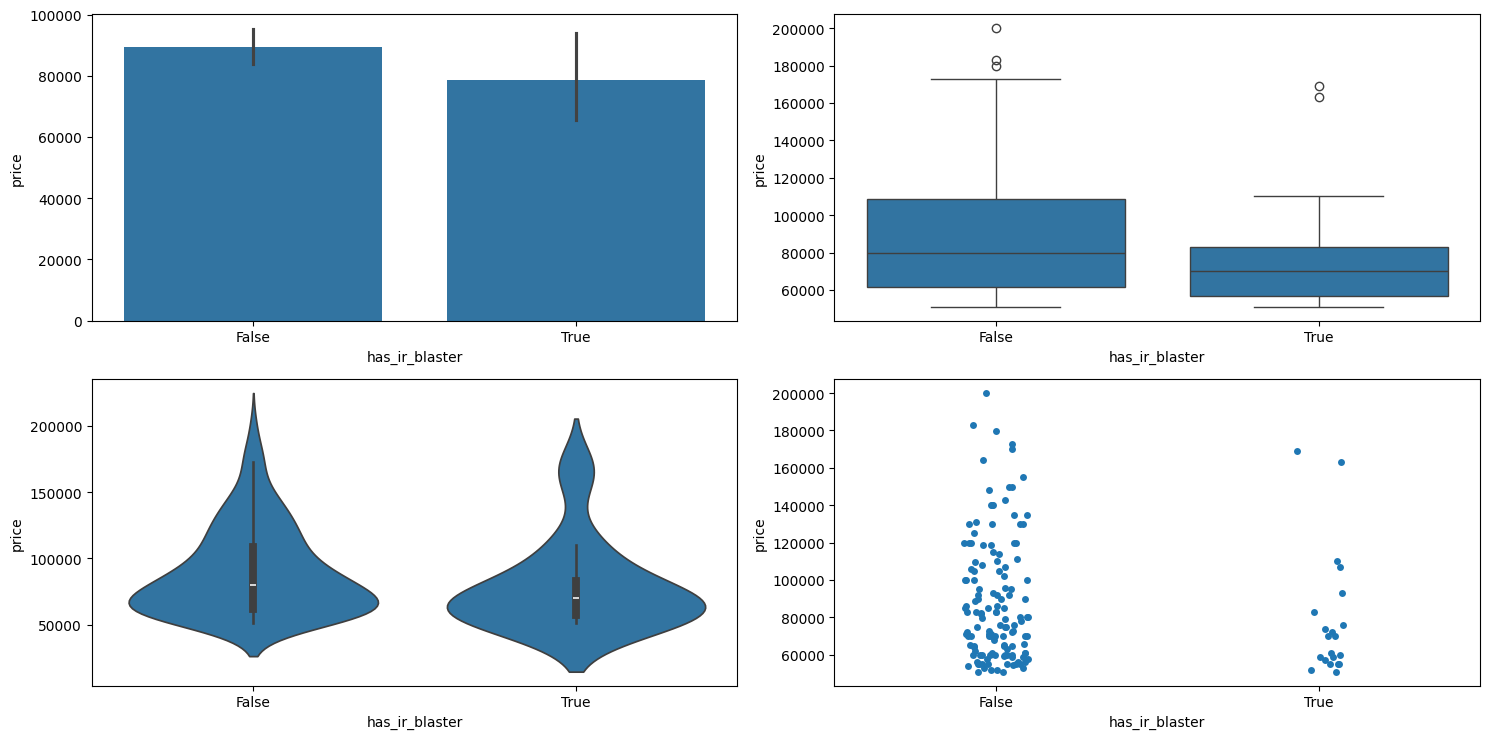

In [44]:
numerical_categorical_analysis(dataframe = premium, cat_column_1= "has_ir_blaster", num_column = "price")

In [45]:
mann_whitney_test(dataframe = premium, num_col = "price", cat_col = "has_ir_blaster", group_1 = 1, group_2 = 0)

Mann-Whitney U Test Results for price by has_ir_blaster:
Test Statistic: 1048.5
P-Value: 0.05061097552060597
Fail to reject the null hypothesis: No significant difference in price between 1 and 0.


## Observations

- There is no significant association between Price and NFC.
- There is no significant association between Price and IR Blaster.